## Fill codes / parameters inside blocks enclosed in `###`, or lines end with `###`

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import pickle
import os
import sys
import copy

pp_path = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(pp_path)
os.environ["PYTHONPATH"] = pp_path + ":" + os.environ.get("PYTHONPATH", "")
from utils import *
pd.options.mode.chained_assignment = None # None / 'warn'
pd.set_option('display.max_columns', None)

In [2]:
### read dataset

# source: http://archive.ics.uci.edu/ml/datasets/Cardiotocography 
datapath = '../data_raw/Cardiotocography/CTG.xls'
df = pd.read_excel(datapath, 'Data')
df

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Unnamed: 31,A,B,C,D,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240,357,0,0,0,0,0,0,0,NaN,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,NaN,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
1,5,632,4,0,4,2,0,0,0,NaN,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,NaN,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
2,177,779,2,0,5,2,0,0,0,NaN,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,NaN,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,411,1192,2,0,6,2,0,0,0,NaN,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,NaN,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,533,1147,4,0,5,0,0,0,0,NaN,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,NaN,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059,2867,0,0,6,0,0,0,0,NaN,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,NaN,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2122,1576,2867,1,0,9,0,0,0,0,NaN,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,NaN,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2123,1576,2596,1,0,7,0,0,0,0,NaN,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,NaN,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2124,1576,3049,1,0,9,0,0,0,0,NaN,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,NaN,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,NaN,5,NaN,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   int64  
 1   e            2126 non-null   int64  
 2   AC           2126 non-null   int64  
 3   FM           2126 non-null   int64  
 4   UC           2126 non-null   int64  
 5   DL           2126 non-null   int64  
 6   DS           2126 non-null   int64  
 7   DP           2126 non-null   int64  
 8   DR           2126 non-null   int64  
 9   Unnamed: 9   0 non-null      float64
 10  LB           2126 non-null   int64  
 11  AC.1         2126 non-null   float64
 12  FM.1         2126 non-null   float64
 13  UC.1         2126 non-null   float64
 14  DL.1         2126 non-null   float64
 15  DS.1         2126 non-null   float64
 16  DP.1         2126 non-null   float64
 17  ASTV         2126 non-null   int64  
 18  MSTV         2126 non-null   float64
 19  ALTV  

In [4]:
# check for missing values

df.isnull().sum()

b                 0
e                 0
AC                0
FM                0
UC                0
DL                0
DS                0
DP                0
DR                0
Unnamed: 9     2126
LB                0
AC.1              0
FM.1              0
UC.1              0
DL.1              0
DS.1              0
DP.1              0
ASTV              0
MSTV              0
ALTV              0
MLTV              0
Width             0
Min               0
Max               0
Nmax              0
Nzeros            0
Mode              0
Mean              0
Median            0
Variance          0
Tendency          0
Unnamed: 31    2126
A                 0
B                 0
C                 0
D                 0
E                 0
AD                0
DE                0
LD                0
FS                0
SUSP              0
Unnamed: 42    2126
CLASS             0
Unnamed: 44    2126
NSP               0
dtype: int64

In [5]:
df.drop('DL.1', axis=1, inplace=True)
df.drop('DS.1', axis=1, inplace=True)
df.drop('DP.1', axis=1, inplace=True)
df.drop('b', axis=1, inplace=True)
df.drop('e', axis=1, inplace=True)
df.drop('AC', axis=1, inplace=True)
df.drop('FM', axis=1, inplace=True)
df.drop('UC', axis=1, inplace=True)

### remove empty columns 
missing_features = df.isnull().sum()
empty_columns = missing_features[missing_features>=200].index
df.drop(empty_columns, axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

df

,DL,DS,DP,DR,LB,AC.1,FM.1,UC.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,0,0,0,0,120,0.000000,0.000000,0.000000,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,2,0,0,0,132,0.006380,0.000000,0.006380,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,2,0,0,0,133,0.003322,0.000000,0.008306,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,2,0,0,0,134,0.002561,0.000000,0.007682,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,0,0,0,0,132,0.006515,0.000000,0.008143,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0,0,0,0,140,0.000000,0.000000,0.007426,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,2
2122,0,0,0,0,140,0.000775,0.000000,0.006971,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,2
2123,0,0,0,0,140,0.000980,0.000000,0.006863,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,2
2124,0,0,0,0,140,0.000679,0.000000,0.006110,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,2


In [6]:
df.isnull().sum()

DL          0
DS          0
DP          0
DR          0
LB          0
AC.1        0
FM.1        0
UC.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [7]:
### preprocessing columns

# assign the column name of the target feature as "Target"
df.rename(columns={"NSP":"Target"}, inplace=True)

# make sure the label ranges from 0 to (num_class-1)
# Targets = Normal=0; Suspect=1; Pathologic=2
df["Target"] = df["Target"].replace({1:0})
df["Target"] = df["Target"].replace({2:1})
df["Target"] = df["Target"].replace({3:2})

print('\ndata shape: ', df.shape, sep='')
print('\ncolumn names:\n', list(df.columns), sep='')
print('\nclass distribution:\n', df.Target.value_counts(), sep='')
print('\ncolumn types:\n', df.dtypes, sep='')


data shape: (2126, 34)

column names:
['DL', 'DS', 'DP', 'DR', 'LB', 'AC.1', 'FM.1', 'UC.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'Target']

class distribution:
0    1655
1     295
2     176
Name: Target, dtype: int64

column types:
DL            int64
DS            int64
DP            int64
DR            int64
LB            int64
AC.1        float64
FM.1        float64
UC.1        float64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
A             int64
B             int64
C             int64
D             int64
E             int64
AD            int64
DE            int64
LD            int64
FS            

In [8]:
df.describe(include='all')

,DL,DS,DP,DR,LB,AC.1,FM.1,UC.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,Target
count,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,1.570085,0.003293,0.126058,0.0,133.303857,0.003170,0.009474,0.004357,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,-0.638758,-0.455315,-0.950141,-0.923801,-0.932267,-0.687676,-0.762935,-0.899341,-0.935089,-0.814675,4.509878,0.304327
std,2.499229,0.057300,0.464361,0.0,9.840844,0.003860,0.046670,0.002940,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.769589,0.890540,0.311894,0.382964,0.361856,0.726188,0.646627,0.437350,0.354495,0.580054,3.026883,0.614377
min,0.000000,0.000000,0.000000,0.0,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,126.000000,0.000000,0.000000,0.001876,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,133.000000,0.001630,0.000000,0.004482,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,0.000000
75%,3.000000,0.000000,0.000000,0.0,140.000000,0.005631,0.002512,0.006525,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000,0.000000
max,16.000000,1.000000,4.000000,0.0,160.000000,0.019284,0.480634,0.014925,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000


In [9]:
categorical_features = ['A', 'B', 'C', 'D', 'E','AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS'] ###
continuous_features = list(OrderedSet(df.columns.to_list()) - OrderedSet(["Target"]) - OrderedSet(categorical_features))
print('continuous_features:', continuous_features)
print('\ncategorical_features:', categorical_features)


continuous_features: ['DL', 'DS', 'DP', 'DR', 'LB', 'AC.1', 'FM.1', 'UC.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']

categorical_features: ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']


In [10]:
### fill NA

for c in df.columns[df.isnull().any(axis=0)]:
    if c in continuous_features:
        df[c].fillna(df[c].mean(), inplace=True)
    else:
        df[c].fillna(df[c].mode()[0], inplace=True)
df

,DL,DS,DP,DR,LB,AC.1,FM.1,UC.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,Target
0,0,0,0,0,120,0.000000,0.000000,0.000000,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,9,1
1,2,0,0,0,132,0.006380,0.000000,0.006380,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,6,0
2,2,0,0,0,133,0.003322,0.000000,0.008306,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,6,0
3,2,0,0,0,134,0.002561,0.000000,0.007682,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,6,0
4,0,0,0,0,132,0.006515,0.000000,0.008143,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0,0,0,0,140,0.000000,0.000000,0.007426,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,1
2122,0,0,0,0,140,0.000775,0.000000,0.006971,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,1
2123,0,0,0,0,140,0.000980,0.000000,0.006863,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,1
2124,0,0,0,0,140,0.000679,0.000000,0.006110,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,5,1


In [11]:
# shuffle and split data into train/(val)/test

train_fraction = 0.8 ###
df_train, df_test = shuffle_split_data(df, train_fraction)

print('train:', df_train.shape)
print(np.unique(df_train.Target, return_counts=True))
print('\ntest:', df_test.shape)
print(np.unique(df_test.Target, return_counts=True))

train: (1700, 34)
(array([0, 1, 2]), array([1323,  236,  141]))

test: (426, 34)
(array([0, 1, 2]), array([332,  59,  35]))


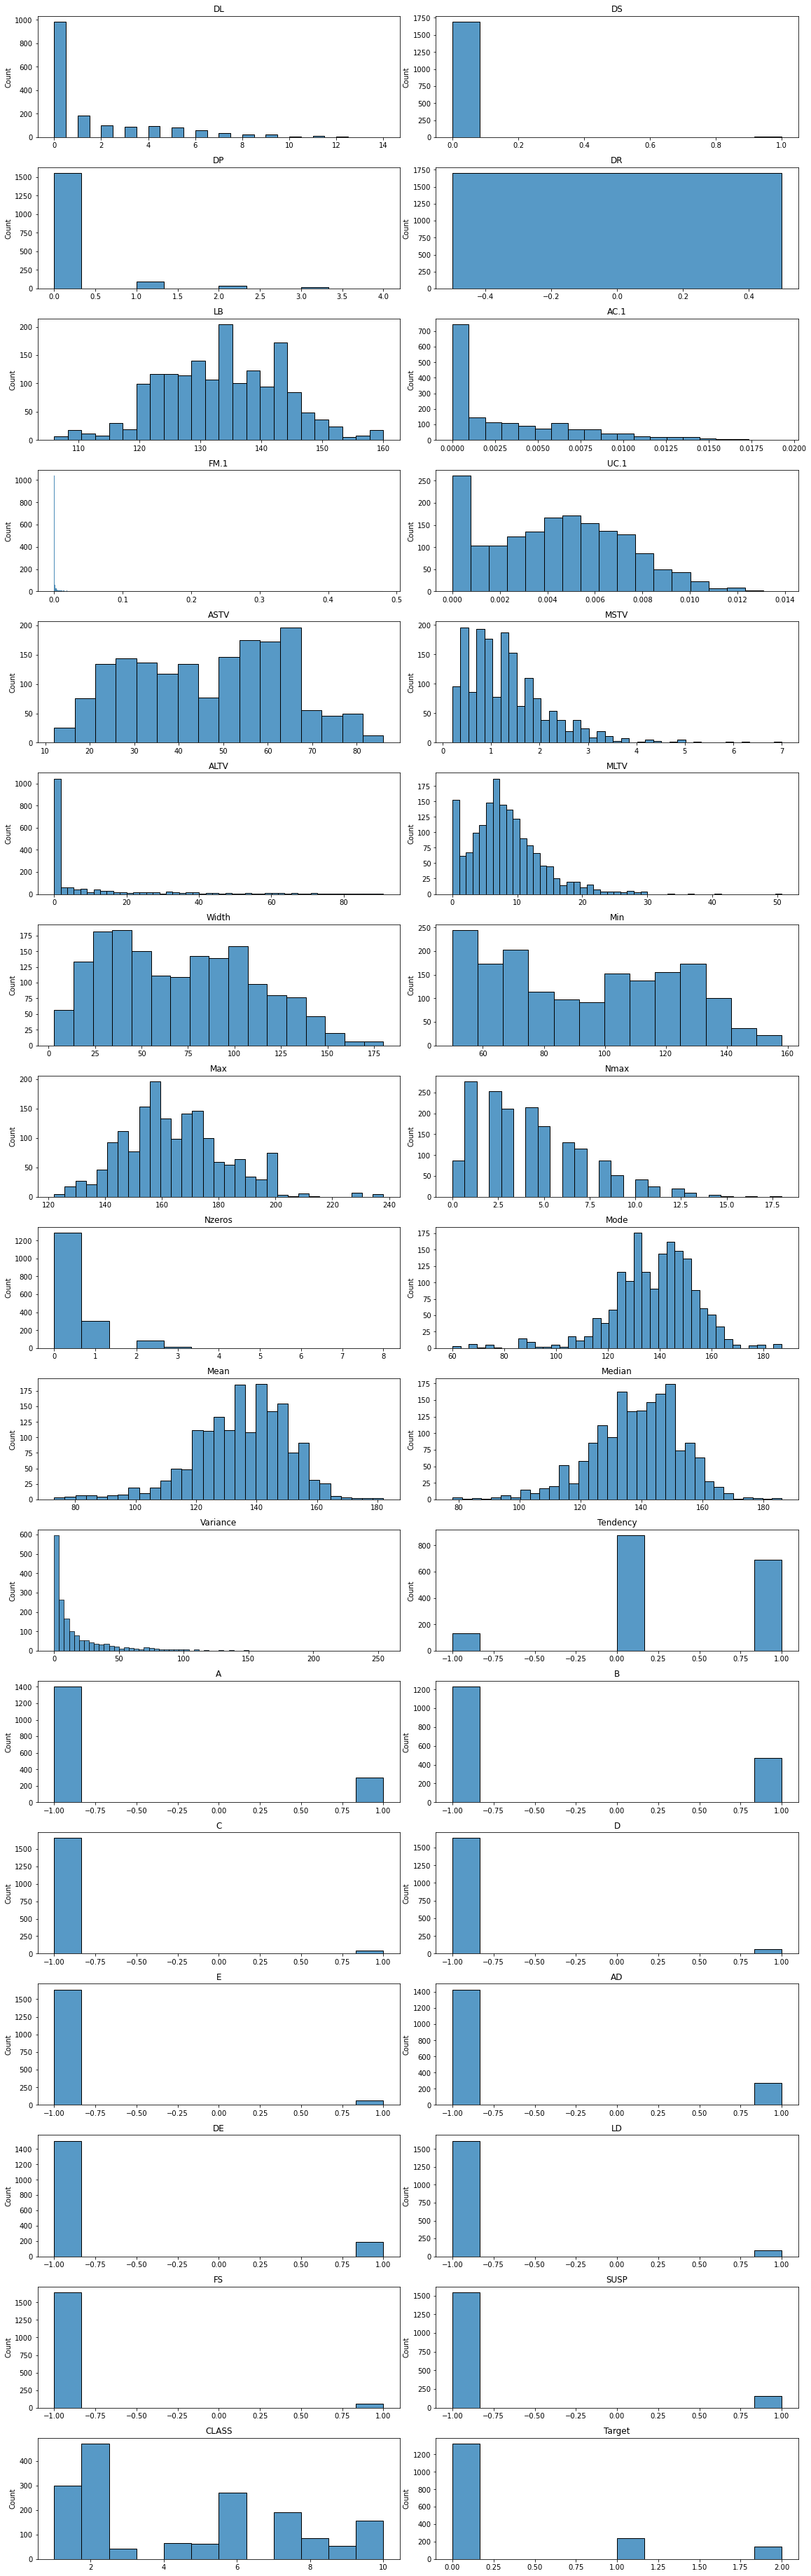

In [12]:
# plot histograms of the training data

ncol, nrow = 2, int(np.ceil(len(df_train.columns)/2))
figsize = (16,3*nrow)

plot_hist(df_train, figsize, nrow, ncol)

In [13]:
### preprocessing

# clip outlier values
pd.options.mode.chained_assignment = None # None / 'warn'
def _clip_outliers(_df):
    _df.loc[_df["FM.1"]>0.00139*15,"FM.1"] = 0.00139*15

_clip_outliers(df_train)
_clip_outliers(df_test)

In [14]:
# scaling

for feature in df_train.columns:
    if feature in (categorical_features+["Target"]):
        continue
    else:
        lower = np.percentile(df_train[feature], 2)
        upper = np.percentile(df_train[feature], 95 if feature in ["FM.1", "ALTV"] else 98)

    df_train.loc[df_train[feature]<lower, feature] = lower
    df_train.loc[df_train[feature]>upper, feature] = upper
    df_test.loc[df_test[feature]<lower, feature] = lower
    df_test.loc[df_test[feature]>upper, feature] = upper
    
scaler_list = [MinMaxScaler(clip=True), MinMaxScaler(clip=True)]   ### StandardScaler() / MinMaxScaler(clip=True)
feature_list = [continuous_features, categorical_features]
df_train_scaled, df_test_scaled = scale_features(df_train, df_test, feature_list, scaler_list)

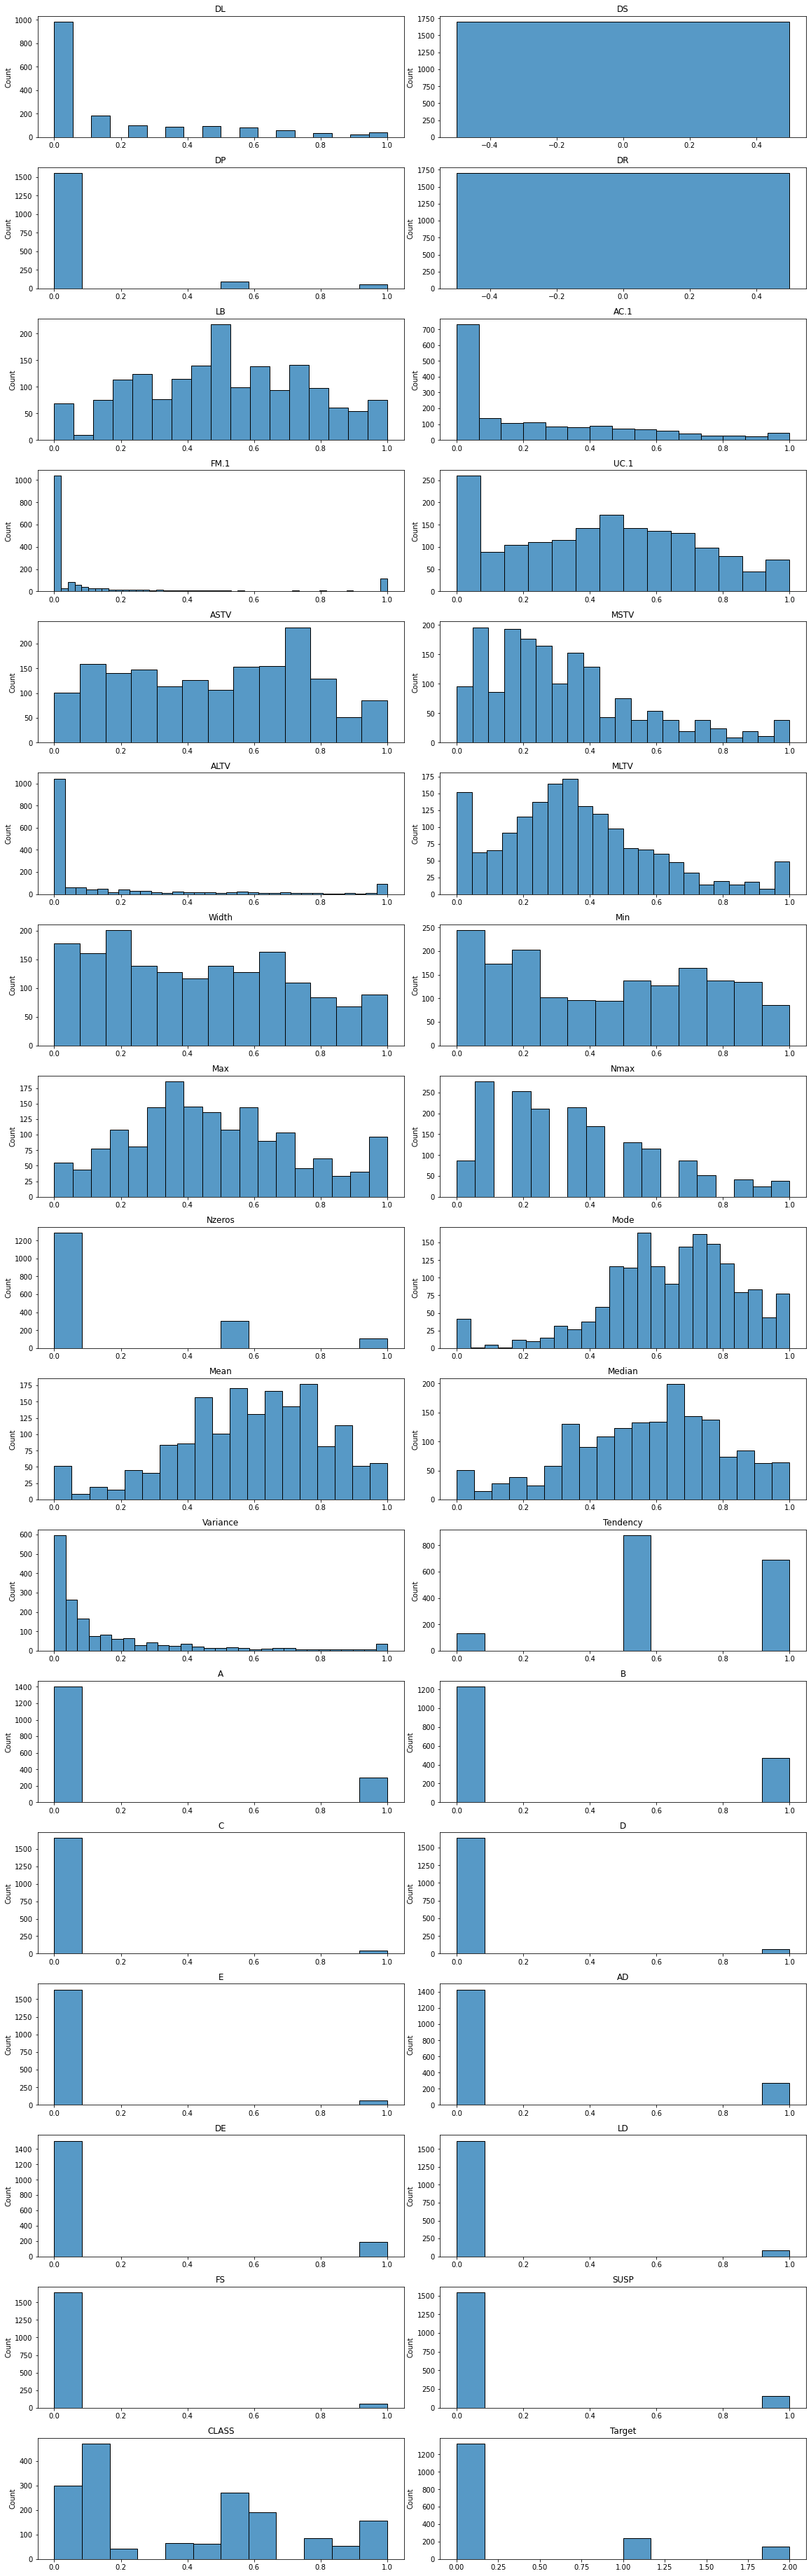

In [15]:
plot_hist(df_train_scaled, figsize, nrow, ncol)

In [16]:
df_train_scaled

,DL,DS,DP,DR,LB,AC.1,FM.1,UC.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,Target
0,1.000000,0.0,0.0,0.0,0.290221,0.000000,0.060178,0.746234,0.774194,0.257143,0.000000,0.246637,0.470666,0.145803,0.117647,0.416667,0.5,0.351432,0.227507,0.183605,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0
1,0.000000,0.0,0.0,0.0,0.710831,0.455344,0.000000,0.619530,0.661290,0.314286,0.000000,0.255605,0.485370,0.458238,0.588235,0.500000,0.5,0.702593,0.697061,0.716761,0.074074,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0
2,0.000000,0.0,0.0,0.0,0.921136,0.091526,0.000000,0.747171,0.612903,0.085714,0.338983,0.286996,0.081017,1.000000,0.558824,0.166667,0.0,0.878174,0.893972,0.866711,0.000000,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.000000,0.0,0.0,0.0,0.710831,0.689915,1.000000,0.000000,0.467742,0.257143,0.035682,0.130045,0.750037,0.083316,0.588235,0.583333,0.0,0.864668,0.803090,0.800067,0.074074,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0
4,0.000000,0.0,0.0,0.0,0.815983,0.357717,0.000000,0.324467,0.467742,0.171429,0.000000,0.376682,0.139832,0.937305,0.573529,0.166667,0.0,0.851162,0.848531,0.800067,0.027778,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.222222,0.0,0.0,0.0,0.369085,0.120821,0.000000,1.000000,0.209677,0.828571,0.000000,0.668161,0.948537,0.000000,0.867647,0.833333,0.0,0.472988,0.560739,0.400200,0.638889,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0
1696,0.000000,0.0,0.0,0.0,0.553102,0.077753,0.000000,0.317368,0.774194,0.114286,0.000000,0.461883,0.191295,0.718600,0.367647,0.333333,0.0,0.770124,0.681915,0.650117,0.055556,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0
1697,0.666667,0.0,0.0,0.0,0.605678,0.720827,0.000000,0.560422,0.629032,0.400000,0.000000,0.318386,0.911778,0.020829,0.823529,0.416667,0.0,0.783630,0.712208,0.883372,0.546296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0
1698,0.000000,0.0,0.5,0.0,0.447950,0.000000,1.000000,0.000000,1.000000,0.028571,0.000000,0.340807,0.272166,0.479067,0.191176,0.250000,0.0,0.243382,0.439564,0.400200,0.416667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.888889,2
